In [743]:
import pandas as pd
import numpy as np
import random
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [723]:
# Load dataset
data = pd.read_csv('bank.csv')
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [724]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [725]:

# Overview of the dataset
# 1. Display basic information about the dataset including column names and types
print("Dataset Information:")
print(data.info())
print()
print()
# 2. Display summary statistics of the numerical features
print("\nSummary Statistics:")
print(data.describe())
print()
print()
# 3. Check for missing values in each column
print("\nMissing Values per Column:")
print(data.isnull().sum())  # Check for missing values
print()
print()
# Get the dataset features
data.columns


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None



Summary Statistics:
               age       balance          day     

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [726]:
# Dataset shape
print(data.shape)
print()
# Separate numerical and categorical features from the dataset
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Print the names of numerical and categorical features
print("Numerical Features:")
print(numerical_features)
print()
print("Categorical Features:")
print(categorical_features)

(4521, 17)

Numerical Features:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Categorical Features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


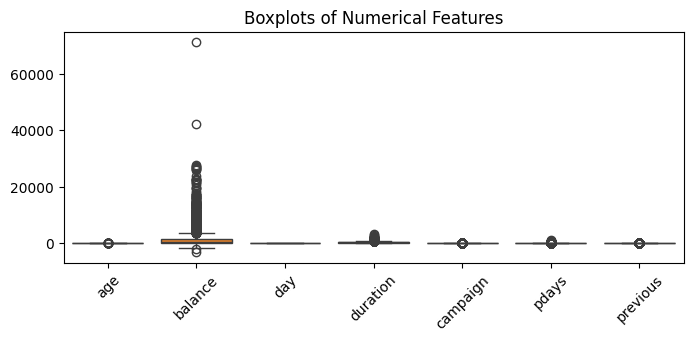

In [727]:
# Plot boxplots for each numerical feature
plt.figure(figsize=(8, 3))
sn.boxplot(data=data.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

In [728]:

# Assume 'data' is your DataFrame and 'balance' is the feature
skewed_features = ['balance']

# Make sure there are no non-positive values before taking the log
for feature in skewed_features:
    if data[feature].min() <= 0:
        data[feature] = data[feature] + abs(data[feature].min()) + 1
    data[feature] = np.log1p(data[feature])


# Handle outliers using IQR (Interquartile Range) for 'duration' column
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1

# Cap values beyond 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['duration'] = np.where(data['duration'] > upper_bound, upper_bound,
                   np.where(data['duration'] < lower_bound, lower_bound, data['duration']))


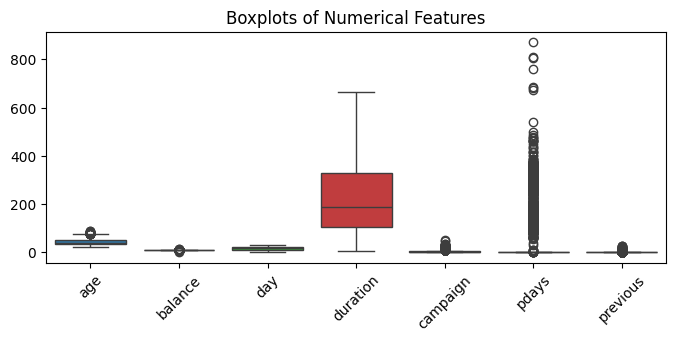

In [729]:
# Plot boxplots for each numerical feature
plt.figure(figsize=(8, 3))
sn.boxplot(data=data.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

In [730]:
# Handle outliers in 'pdays' using IQR
Q1_pdays = data['pdays'].quantile(0.25)
Q3_pdays = data['pdays'].quantile(0.75)
IQR_pdays = Q3_pdays - Q1_pdays

# Cap values beyond 1.5 * IQR for 'pdays'
lower_bound_pdays = Q1_pdays - 1.5 * IQR_pdays
upper_bound_pdays = Q3_pdays + 1.5 * IQR_pdays

data['pdays'] = np.where(data['pdays'] > upper_bound_pdays, upper_bound_pdays,
                         np.where(data['pdays'] < lower_bound_pdays, lower_bound_pdays, data['pdays']))


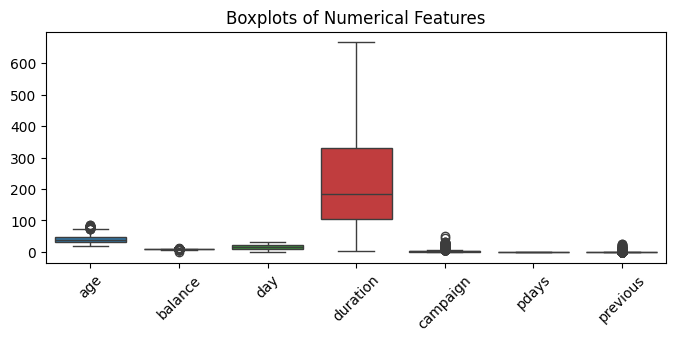

In [731]:
# Plot boxplots for each numerical feature
plt.figure(figsize=(8, 3))
sn.boxplot(data=data.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

In [732]:
# # Separate features and target
X = data.drop('y', axis=1)  # Replace 'y' with the name of the target column
# X = data
y = data['y']

In [733]:
print(y.value_coyunts())

y
no     4000
yes     521
Name: count, dtype: int64


In [734]:
# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target column
y = LabelEncoder().fit_transform(y)

In [735]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=425985)

In [736]:
# Apply StandardScaler to the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [737]:
# Apply SMOTE to the training set using the following package: from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of target classes after SMOTE
y_train_smote_series = pd.Series(y_train_smote)
print(y_train_smote_series.value_counts())


0    3199
1    3199
Name: count, dtype: int64


The dataset was highly imbalanced before we applied the SMOTE package on the train set.

When working on a classification problem and the classes in the target variable are highly imbalanced (e.g., 90% of class "no" and 10% of class "yes"), SMOTE can help balance the dataset by generating synthetic samples for the minority class.



In [738]:
# Initialize and train the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [739]:
# Predict the target on the test set
y_pred = model.predict(X_test)

In [740]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       801
           1       1.00      1.00      1.00       104

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905



In [741]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[801   0]
 [  0 104]]


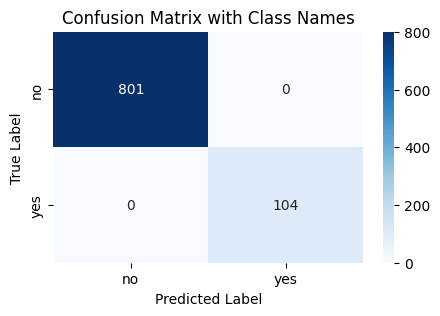

In [742]:
class_names = ['no', 'yes']
plt.figure(figsize=(5, 3))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Class Names')
plt.show()


In [680]:
# Looking at the confusion matrix you've provided, it seems that even after 
# applying SMOTE, the imbalance in correctly predicting the minority class ("yes") persists.

In [681]:
# # Build a Neural Network model
# model = Sequential()
# model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 16 neurons
# model.add(Dense(8, activation='relu'))  # Hidden layer with 8 neurons
# model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# model = Sequential([
#     Dense(16, input_dim=X_train.shape[1], activation='relu'),                 # Input layer with 16 neurons
#     Dense(8, activation='relu'),                                              # Hidden layer with 8 neurons
#     Dense(1, activation='sigmoid')                                            # Output layer for binary classification
# ])

# Neural Network model with L2 Regularization fro improvement 
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),        # Input layer with 16 neurons 
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),                                     # Hidden layer with 8 neurons
    Dense(1, activation='sigmoid')                                                                # Output layer for binary classification
])

/usr/local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [682]:
# Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#  adjust the learning rate by modifying the Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to get the number of parameters
model.summary()

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=10, validation_split=0.2, verbose=1)


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Test Accuracy: {accuracy:.2f}')

# Predict the target on the test set
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Evaluate the model's performance
print('Classification Report:')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5602 - loss: 0.7917 - val_accuracy: 0.6925 - val_loss: 0.6192
Epoch 2/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7919 - loss: 0.5028 - val_accuracy: 0.7121 - val_loss: 0.6074
Epoch 3/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8152 - loss: 0.4464 - val_accuracy: 0.7355 - val_loss: 0.6071
Epoch 4/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8247 - loss: 0.4275 - val_accuracy: 0.7347 - val_loss: 0.6159
Epoch 5/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8253 - loss: 0.4251 - val_accuracy: 0.7911 - val_loss: 0.5425
Epoch 6/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8330 - loss: 0.4125 - val_accuracy: 0.8020 - val_loss: 0.5436
Epoch 7/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8447 - loss: 0.4010 - val_accuracy: 0.7684 - val_loss: 0.5817
Epoch 8/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8370 - loss: 0.4132 - val_accuracy: 0.

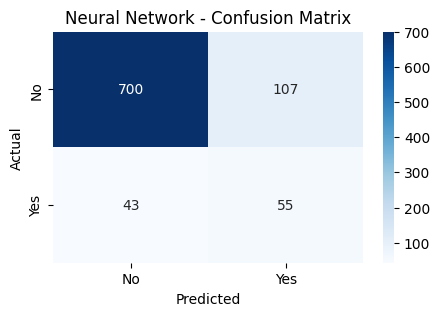

In [683]:
# Plot confusion matrix for Neural Network
cm_nn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sn.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Neural Network - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

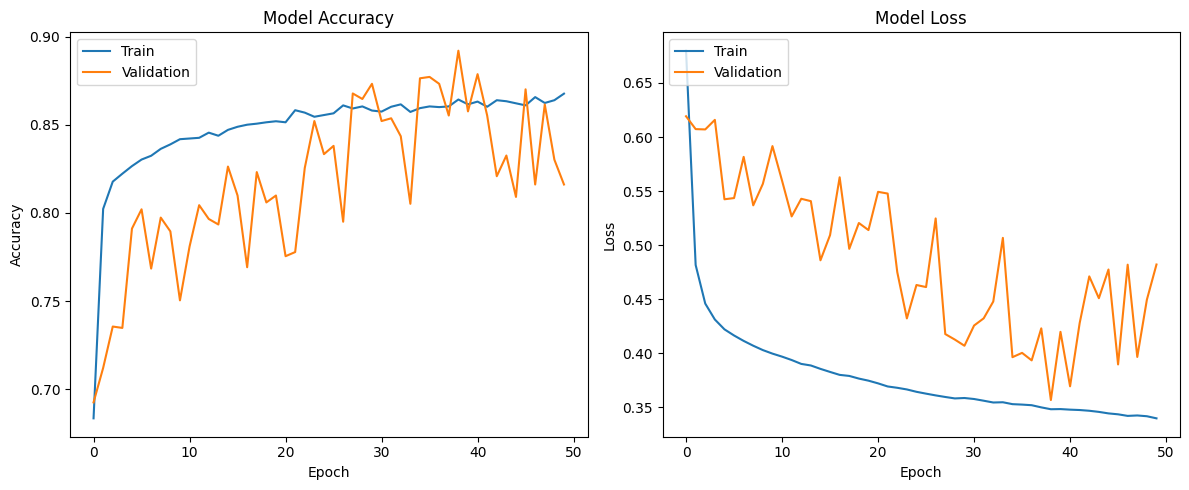

In [684]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Logistic Regression Accuracy: 0.79
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       807
           1       0.32      0.80      0.46        98

    accuracy                           0.79       905
   macro avg       0.64      0.80      0.66       905
weighted avg       0.90      0.79      0.83       905



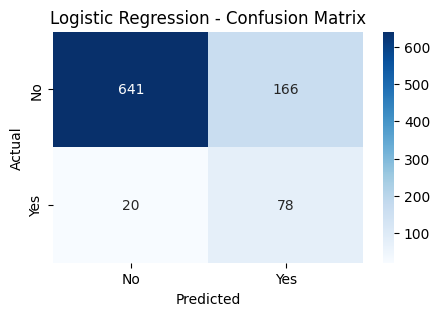

Random Forest Accuracy: 0.88
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       807
           1       0.45      0.44      0.44        98

    accuracy                           0.88       905
   macro avg       0.69      0.69      0.69       905
weighted avg       0.88      0.88      0.88       905



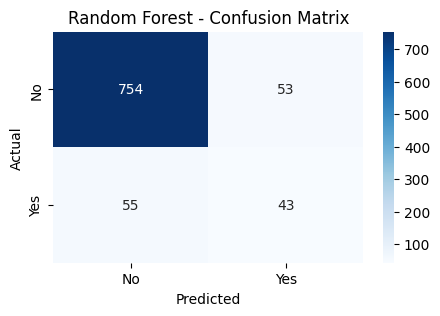

SVM Accuracy: 0.83
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       807
           1       0.34      0.65      0.45        98

    accuracy                           0.83       905
   macro avg       0.65      0.75      0.67       905
weighted avg       0.89      0.83      0.85       905



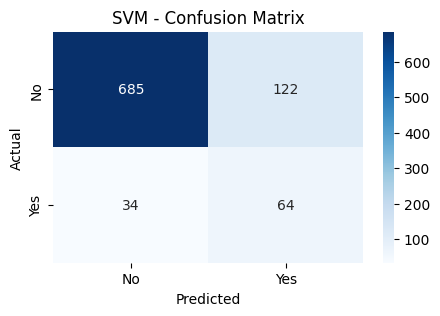

K-Nearest Neighbors Accuracy: 0.79
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       807
           1       0.28      0.61      0.39        98

    accuracy                           0.79       905
   macro avg       0.61      0.71      0.63       905
weighted avg       0.87      0.79      0.82       905



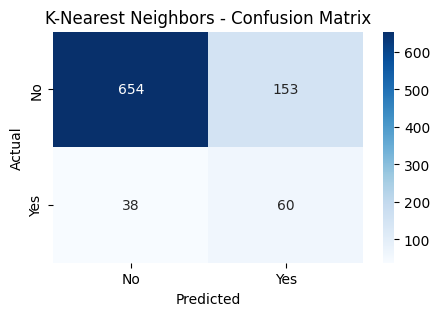

Gradient Boosting Accuracy: 0.87
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       807
           1       0.41      0.53      0.46        98

    accuracy                           0.87       905
   macro avg       0.68      0.72      0.69       905
weighted avg       0.88      0.87      0.87       905



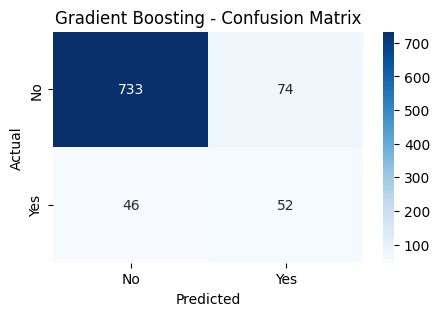

In [685]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(f'{name} Classification Report:')
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 3))
    sn.heatmap(cm, annot=True, fmt='d', 
        cmap='Blues', xticklabels=['No', 'Yes'], 
        yticklabels=['No', 'Yes'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

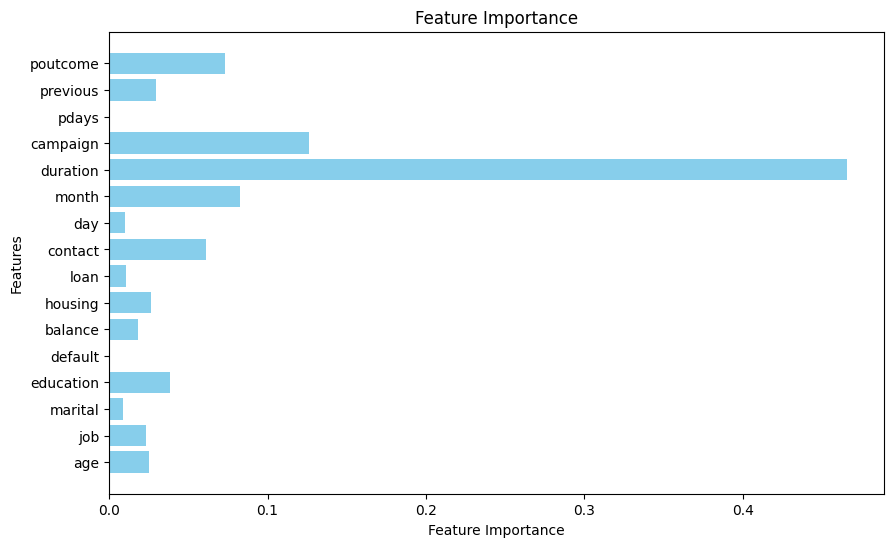

In [686]:
# Extract feature importances
feature_importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

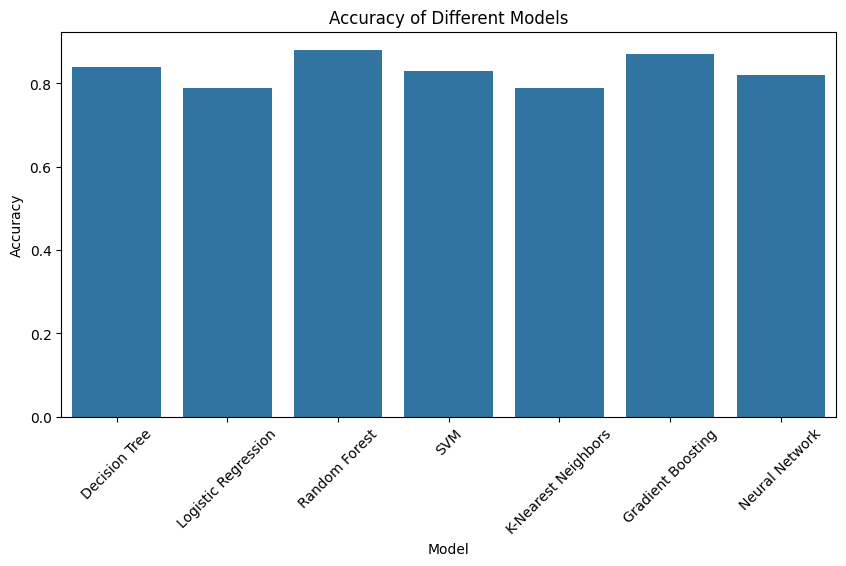

In [687]:
# Plot of the use model
model_names = ["Decision Tree", "Logistic Regression", "Random Forest", "SVM", "K-Nearest Neighbors", "Gradient Boosting", "Neural Network"]
accuracies = [0.84, 0.79, 0.88, 0.83, 0.79, 0.87, 0.82]  # Replace these with actual accuracies obtained

plt.figure(figsize=(10, 5))
sn.barplot(x=model_names, y=accuracies)              
plt.xticks(rotation=45)
plt.title("Accuracy of Different Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()


In [688]:
# Converte the train set to dataframe
X_train_ = pd.DataFrame(X_train)

In [689]:
X_train_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.678371,-0.757823,-1.913483,1.029443,-0.124278,-0.506575,-1.127545,-0.425356,-0.719767,0.489967,1.156966,0.690034,-0.567241,0.0,-0.314583,0.443642
1,-0.866030,-0.141959,-0.244608,1.029443,-0.124278,0.759027,-1.127545,-0.425356,-0.719767,-0.238237,-1.502658,-0.586227,0.671186,0.0,-0.314583,0.443642
2,-0.678371,1.397702,1.424266,-0.306690,-0.124278,0.065666,-1.127545,-0.425356,-0.719767,-0.966441,-1.502658,-0.930871,-0.257635,0.0,-0.314583,0.443642
3,-0.959860,-0.141959,-0.244608,1.029443,-0.124278,-0.591606,-1.127545,-0.425356,-0.719767,-0.359604,-1.502658,2.230163,1.290399,0.0,-0.314583,0.443642
4,0.447585,-1.065756,-0.244608,-1.642823,-0.124278,-0.509733,0.886883,-0.425356,1.503793,1.339538,0.824513,-0.139266,-0.567241,0.0,-0.314583,0.443642


In [690]:
X_train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3616 non-null   float64
 1   1       3616 non-null   float64
 2   2       3616 non-null   float64
 3   3       3616 non-null   float64
 4   4       3616 non-null   float64
 5   5       3616 non-null   float64
 6   6       3616 non-null   float64
 7   7       3616 non-null   float64
 8   8       3616 non-null   float64
 9   9       3616 non-null   float64
 10  10      3616 non-null   float64
 11  11      3616 non-null   float64
 12  12      3616 non-null   float64
 13  13      3616 non-null   float64
 14  14      3616 non-null   float64
 15  15      3616 non-null   float64
dtypes: float64(16)
memory usage: 452.1 KB


In [691]:
num_to_replace = int(X_train_.size * 20 / 100)

In [692]:
# Flatten the DataFrame to get all the (row, column) pairs
row_indices = X_train_.index.values
col_indices = X_train_.columns.values

In [693]:
# Randomly choose which elements to replace with NaN
for _ in range(num_to_replace):
    row = random.choice(row_indices)
    col = random.choice(col_indices)
    X_train_.at[row, col] = np.nan
X_train_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.678371,-0.757823,NaN,1.029443,-0.124278,-0.506575,-1.127545,-0.425356,-0.719767,0.489967,1.156966,0.690034,-0.567241,NaN,-0.314583,0.443642
1,-0.866030,-0.141959,-0.244608,1.029443,-0.124278,0.759027,-1.127545,-0.425356,NaN,-0.238237,NaN,-0.586227,0.671186,0.0,-0.314583,0.443642
2,-0.678371,1.397702,1.424266,-0.306690,-0.124278,0.065666,NaN,-0.425356,-0.719767,-0.966441,-1.502658,-0.930871,-0.257635,0.0,-0.314583,0.443642
3,-0.959860,-0.141959,NaN,1.029443,NaN,-0.591606,-1.127545,NaN,NaN,NaN,-1.502658,2.230163,1.290399,0.0,-0.314583,0.443642
4,0.447585,-1.065756,-0.244608,-1.642823,-0.124278,-0.509733,0.886883,-0.425356,NaN,1.339538,NaN,-0.139266,NaN,0.0,-0.314583,0.443642


In [694]:
# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=3)  # You can choose the number of neighbors

# Fit and transform the dataset
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_), columns=X_train_.columns)

print("\nDataFrame after KNN Imputation:")
X_train_imputed.head()



DataFrame after KNN Imputation:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.678371,-0.757823,0.311683,1.029443,-0.124278,-0.506575,-1.127545,-0.425356,-0.719767,0.489967,1.156966,0.690034,-0.567241,0.0,-0.314583,0.443642
1,-0.866030,-0.141959,-0.244608,1.029443,-0.124278,0.759027,-1.127545,-0.425356,-0.719767,-0.238237,-0.726935,-0.586227,0.671186,0.0,-0.314583,0.443642
2,-0.678371,1.397702,1.424266,-0.306690,-0.124278,0.065666,-0.456069,-0.425356,-0.719767,-0.966441,-1.502658,-0.930871,-0.257635,0.0,-0.314583,0.443642
3,-0.959860,-0.141959,-0.800900,1.029443,-0.124278,-0.591606,-1.127545,0.500087,-0.719767,0.651790,-1.502658,2.230163,1.290399,0.0,-0.314583,0.443642
4,0.447585,-1.065756,-0.244608,-1.642823,-0.124278,-0.509733,0.886883,-0.425356,0.762607,1.339538,-0.505299,-0.139266,-0.051230,0.0,-0.314583,0.443642


In [695]:
# Initialize and train the decision tree classifier (KNNImputer)
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train_imputed, y_train)

DecisionTreeClassifier(random_state=42)

In [696]:
# Predict the target on the test set
y_pred_ = model.predict(X_test)

In [697]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_))

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       807
           1       0.41      0.53      0.46        98

    accuracy                           0.87       905
   macro avg       0.68      0.72      0.69       905
weighted avg       0.88      0.87      0.87       905



In [698]:
# Applying PCA to reduce dimensionality (keeping enough components to explain 95% of the variance)
pca = PCA(n_components=0.95)  # Retain 95% of variance

# Fit PCA on the scaled training data
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test)  # Transform the test data as well

In [699]:
# Initialize and train the decision tree classifier (PCA)
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train_pca, y_train)

DecisionTreeClassifier(random_state=42)

In [700]:
# Predict the target on the test set
y_pred_PCA = model2.predict(X_test_pca)

In [701]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_PCA)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_PCA))

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       807
           1       0.27      0.35      0.30        98

    accuracy                           0.83       905
   macro avg       0.59      0.62      0.60       905
weighted avg       0.85      0.83      0.84       905



In [ ]:
# 9. Conclusion

# Summary: Recap the main goal and findings. "In summary, we used
# a dataset of customer information and marketing interactions to predict term 
# deposit subscription outcomes. By cleaning and preprocessing the data, followed 
# by using a Decision Tree model, we obtained promising results but have room for improvement."

# Impact: State the business impact. "With an accurate predictive model, the bank can focus its marketing efforts on customers most likely to subscribe, reducing costs and improving the efficiency of campaigns."
Processing the dataset and using several models, I obtained promissing result; but have room for improvement. The bank should focus its marketing efforts on customers most likely to subscribe, reducing costs and improving the efficiency of campaigns.